# All contact site aa

In [1]:
USE1_cs = [734, 764, 765, 766, 856, 857, 858, 859, 861, 892, 893, 899, 900]
ZW10_cs = [1336, 1338, 1339, 1340, 1342, 1343, 1347, 1348, 1350, 1351, 1354, 1357, 1358, 1470, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1501, 1505, 1508, 1509, 1512, 1515, 1516, 1542, 1543, 1546, 1547, 1549, 1550, 1552, 1568, 1569, 1572, 1573, 1576, 1584, 1585, 1586, 1587, 1588, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1605, 1608, 1612, 1640, 1643]
RAB18_cs = [1077, 1078, 1081, 1085, 1128, 1179, 1180, 1183, 1184, 1186, 1231, 1233, 1234, 1237]
UPF3B_cs = []
# Define your lists

# Create a dictionary to store the lists and their names
lists = {
    'USE1_cs': USE1_cs,
    'ZW10_cs': ZW10_cs,
    'RAB18_cs': RAB18_cs,
    'UPF3B_cs': UPF3B_cs
}

# Variable to track if common elements were found
found_common_elements = False

# Iterate over each pair of lists and find common elements
for list1_name, list1 in lists.items():
    for list2_name, list2 in lists.items():
        if list1_name != list2_name:  # Ensure we're not comparing the same list
            common_elements = set(list1) & set(list2)
            if common_elements:
                print(f"Common elements between {list1_name} and {list2_name}: {common_elements}")
                found_common_elements = True

# If no common elements were found, print "all good"
if not found_common_elements:
    print("all good")


all good


In [2]:
# Iterate over each list and print its minimum and maximum values
for list_name, lst in lists.items():
    min_val = min(lst)
    max_val = max(lst)
    print(f"Minimum value in {list_name}: {min_val}")
    print(f"Maximum value in {list_name}: {max_val}")

Minimum value in USE1_cs: 734
Maximum value in USE1_cs: 900
Minimum value in ZW10_cs: 1336
Maximum value in ZW10_cs: 1643
Minimum value in RAB18_cs: 1077
Maximum value in RAB18_cs: 1237


ValueError: min() arg is an empty sequence

In [5]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_counts = {"pLDDT > 90": [], "70 < pLDDT ≤ 90": [], "50 < pLDDT ≤ 70": [], "pLDDT ≤ 50": []}

with open(pdb_file, 'r') as f:
    start_c = 1
    for line in f:
        if line.startswith('ATOM'):
            if start_c == int(line[22:26].strip()):
                bfactor = float(line[60:66].strip())
                category = categorize_bfactor(bfactor)
                bfactor_counts[category].append(start_c)
                start_c += 1

print(len(bfactor_counts["70 < pLDDT ≤ 90"]))

1594


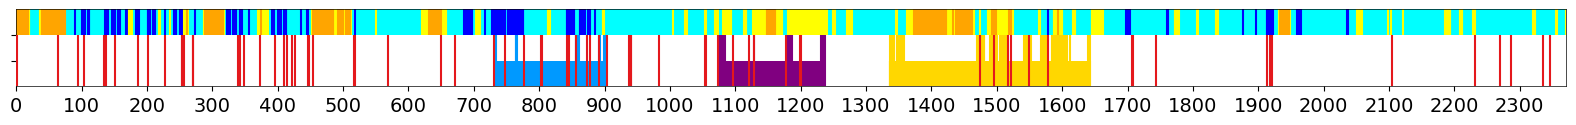

In [7]:
import matplotlib.pyplot as plt
import numpy as np

all_affected_aa = [256, 1, 517, 519, 777, 1549, 270, 271, 1053, 1055, 2335, 803, 804, 1578, 2346, 1073, 2104, 568, 64, 1097, 842, 845, 340, 343, 857, 348, 95, 1121, 103, 1129, 873, 877, 373, 1914, 892, 1918, 1921, 134, 903, 136, 137, 650, 396, 151, 409, 1178, 414, 671, 422, 937, 426, 1707, 940, 941, 1708, 1199, 1201, 2232, 187, 447, 448, 1474, 454, 202, 1743, 1495, 984, 731, 2269, 227, 747, 1517, 2287, 1521, 253, 254]

# Create the plot
plt.figure(figsize=(20, 1))

# Plot vertical lines for each affected amino acid
for aa in all_affected_aa:
    plt.vlines(aa, ymin=0, ymax=2, color='#E4181C', zorder=4)  # zorder ensures the red lines are plotted below other elements

# Define tick locations and labels for every 250 points on the x-axis
x_ticks = np.arange(0, 2371, 100)
x_tick_labels = [str(x) for x in x_ticks]

# USE1_cs
for aa in USE1_cs:
    plt.vlines(aa, ymin=0, ymax=2, color='#0099ff', zorder=2)  # zorder ensures the red lines are plotted below other elements
    
site_range = range(min(USE1_cs),max(USE1_cs))
for aa in site_range:
    plt.vlines(aa, ymin=0, ymax=1, color='#0099ff')  # nowar red of RU flag

# RAB18_cs
for aa in RAB18_cs:
    plt.vlines(aa, ymin=0, ymax=2, color='purple', zorder=2)  # zorder ensures the red lines are plotted below other elements
    
site_range = range(min(RAB18_cs),max(RAB18_cs))
for aa in site_range:
    plt.vlines(aa, ymin=0, ymax=1, color='purple')  # zorder ensures the red lines are plotted below other elements

# ZW10_cs nowar
for aa in ZW10_cs:
    plt.vlines(aa, ymin=0, ymax=2, color='#ffd700', zorder=3)  # nowar golden of UA flag
    
site_range = range(min(ZW10_cs),max(ZW10_cs))
for aa in site_range:
    plt.vlines(aa, ymin=0, ymax=1, color='#ffd700')  # nowar blue of YKT flag
# plddt
for aa in bfactor_counts["70 < pLDDT ≤ 90"]:
    plt.vlines(aa, ymin=2, ymax=3, color='cyan', zorder=2)  # zorder ensures the red lines are plotted below other elements

for aa in bfactor_counts["pLDDT > 90"]:
    plt.vlines(aa, ymin=2, ymax=3, color='blue', zorder=2)  # zorder ensures the red lines are plotted below other elements

for aa in bfactor_counts["50 < pLDDT ≤ 70"]:
    plt.vlines(aa, ymin=2, ymax=3, color='yellow', zorder=2)  # zorder ensures the red lines are plotted below other elements

for aa in bfactor_counts["pLDDT ≤ 50"]:
    plt.vlines(aa, ymin=2, ymax=3, color='orange', zorder=2)  # zorder ensures the red lines are plotted below other elements

# Set x and y axis limits
plt.xlim(0, 2371)
plt.ylim(0, 3)

# Set smaller axis values
plt.gca().tick_params(axis='x', which='both', labelsize=2)

# Set y axis ticks
plt.yticks([1, 2], ['', ''])

# Set custom tick locations and labels for x-axis
plt.xticks(x_ticks, x_tick_labels)

# Add labels and title
plt.xlabel('')

# Adjust the plot for publication quality
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.gca().tick_params(axis='both', which='minor', labelsize=12)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.grid(False)

# Show the plot
plt.show()


# pLDDT count for cs, pv and protein

## PV

In [52]:
def get_bfactor_for_residues(pdb_file, residue_numbers):
    b_factors = []
    for residue_number in residue_numbers:
        with open(pdb_file, 'r') as f:
            for line in f:
                if line.startswith('ATOM'):
                    atom_residue_number = int(line[22:26].strip())
                    if atom_residue_number == residue_number:
                        b_factor = float(line[60:66].strip())
                        b_factors.append(b_factor)
                        break
    return b_factors

def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Пример использования:
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"  # Укажите путь к вашему файлу PDB
residue_numbers = [256, 1, 517, 519, 777, 1549, 270, 271, 1053, 1055, 2335, 803, 804, 1578, 2346, 1073, 2104, 568, 64, 1097, 842, 845, 340, 343, 857, 348, 95, 1121, 103, 1129, 873, 877, 373, 1914, 892, 1918, 1921, 134, 903, 136, 137, 650, 396, 151, 409, 1178, 414, 671, 422, 937, 426, 1707, 940, 941, 1708, 1199, 1201, 2232, 187, 447, 448, 1474, 454, 202, 1743, 1495, 984, 731, 2269, 227, 747, 1517, 2287, 1521, 253, 254]

b_factors = get_bfactor_for_residues(pdb_file, residue_numbers)
if b_factors:
    categories_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}
    total_residues = len(residue_numbers)

    for b_factor in b_factors:
        category = categorize_bfactor(b_factor)
        categories_counts[category] += 1

    print("Результаты категоризации B-factor:")
    for category, count in categories_counts.items():
        percentage = (count / total_residues) * 100
        print(f"{category}: {count} аминокислот ({percentage:.2f}%)")
else:
    print("ошибка 404")
print(len(residue_numbers))

Результаты категоризации B-factor:
pLDDT > 90: 16 аминокислот (21.05%)
70 < pLDDT ≤ 90: 48 аминокислот (63.16%)
50 < pLDDT ≤ 70: 6 аминокислот (7.89%)
pLDDT ≤ 50: 6 аминокислот (7.89%)
76


## CS

In [10]:
def get_bfactor_for_residues(pdb_file, residue_numbers):
    b_factors = []
    for residue_number in residue_numbers:
        with open(pdb_file, 'r') as f:
            for line in f:
                if line.startswith('ATOM'):
                    atom_residue_number = int(line[22:26].strip())
                    if atom_residue_number == residue_number:
                        b_factor = float(line[60:66].strip())
                        b_factors.append(b_factor)
                        break
    return b_factors

def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Пример использования:
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"  # Укажите путь к вашему файлу PDB
residue_numbers = [USE1_cs, ZW10_cs, RAB18_cs]
residue_list = ["USE1_cs", "ZW10_cs", "RAB18_cs"]
count_l = 0
for q in residue_numbers:
    b_factors = get_bfactor_for_residues(pdb_file, q)
    if b_factors:
        categories_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}
        total_residues = len(q)
        print(residue_list[count_l])
        count_l += 1
        for b_factor in b_factors:
            category = categorize_bfactor(b_factor)
            categories_counts[category] += 1
    
        print("Результаты категоризации B-factor:")
        for category, count in categories_counts.items():
            percentage = (count / total_residues) * 100
            print(f"{category}: {count} аминокислот ({percentage:.2f}%)")
        print(len(q))
        print("\n")
    else:
        print("ошибка 404")


USE1_cs
Результаты категоризации B-factor:
pLDDT > 90: 1 аминокислот (7.69%)
70 < pLDDT ≤ 90: 11 аминокислот (84.62%)
50 < pLDDT ≤ 70: 1 аминокислот (7.69%)
pLDDT ≤ 50: 0 аминокислот (0.00%)
13


ZW10_cs
Результаты категоризации B-factor:
pLDDT > 90: 0 аминокислот (0.00%)
70 < pLDDT ≤ 90: 46 аминокислот (63.01%)
50 < pLDDT ≤ 70: 21 аминокислот (28.77%)
pLDDT ≤ 50: 6 аминокислот (8.22%)
73


RAB18_cs
Результаты категоризации B-factor:
pLDDT > 90: 0 аминокислот (0.00%)
70 < pLDDT ≤ 90: 4 аминокислот (28.57%)
50 < pLDDT ≤ 70: 10 аминокислот (71.43%)
pLDDT ≤ 50: 0 аминокислот (0.00%)
14




#### RAB18

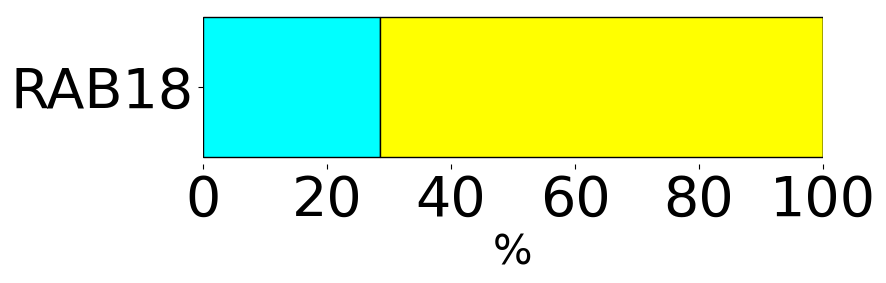

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['RAB18']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[0, 4, 10, 0]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


#### ZW10

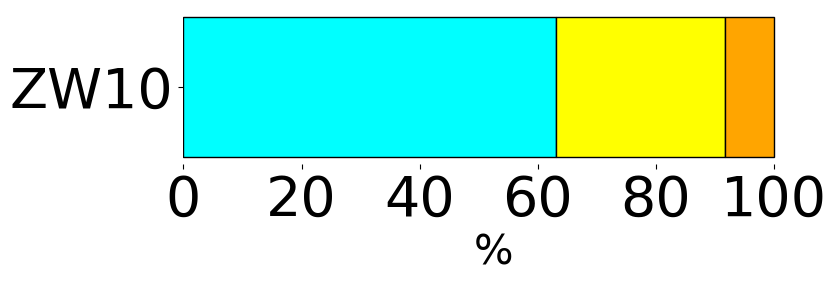

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['ZW10']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[0, 46, 21, 6]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


#### USE1

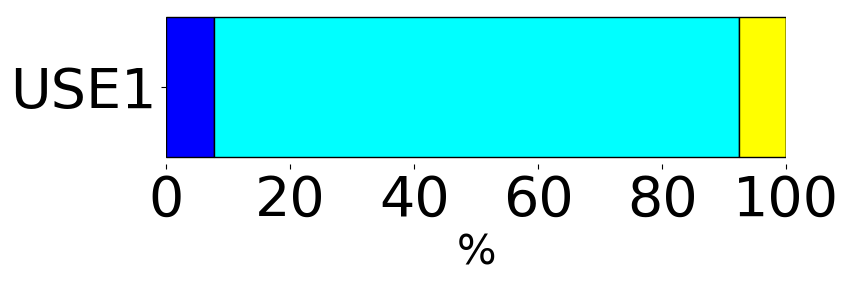

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['USE1']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[1, 11, 1, 0]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


## PV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['PV']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[16, 48, 6, 6]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


## NBAS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['NBAS']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[180, 1594, 334, 263]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


In [4]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}

with open(pdb_file, 'r') as f:
    start_c = 1
    for line in f:
        if line.startswith('ATOM'):
            if start_c == int(line[22:26].strip()):
                bfactor = float(line[60:66].strip())
                category = categorize_bfactor(bfactor)
                bfactor_counts[category] += 1
                start_c += 1


print("B-Factor Ranges for the NBAS Protein:")
for category, count in bfactor_counts.items():
    total_atoms = sum(bfactor_counts.values())
    percentage = (count / total_atoms) * 100 if total_atoms != 0 else 0
    print(f"{category}: {count} atoms ({percentage:.2f}%)")


B-Factor Ranges for the NBAS Protein:
pLDDT > 90: 180 atoms (7.59%)
70 < pLDDT ≤ 90: 1594 atoms (67.23%)
50 < pLDDT ≤ 70: 334 atoms (14.09%)
pLDDT ≤ 50: 263 atoms (11.09%)


# AF3 cif mean

In [9]:
# Import necessary libraries
import pandas as pd
from Bio.PDB import MMCIFParser

# Function to extract B-factors from a CIF file
def extract_b_factors(file_path):
    parser = MMCIFParser()
    structure = parser.get_structure('protein', file_path)
    
    b_factors = []
    for model in structure:
        for chain in model:
            for residue in chain:
                res_id = residue.get_id()
                for atom in residue:
                    b_factors.append({
                        'residue': res_id,
                        'b_factor': atom.get_bfactor()
                    })
    
    df = pd.DataFrame(b_factors)
    return df

# Function to calculate mean B-factors for each residue
def calculate_mean_b_factors(dfs):
    all_b_factors = pd.concat(dfs, ignore_index=True)
    mean_b_factors = all_b_factors.groupby('residue')['b_factor'].mean().reset_index()
    return mean_b_factors

# Function to categorize mean B-factors and count residues in each category
def categorize_mean_b_factors(mean_b_factors_df):
    bfactor_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}
    
    for _, row in mean_b_factors_df.iterrows():
        mean_b_factor = row['b_factor']
        
        if mean_b_factor > 90:
            bfactor_counts["pLDDT > 90"] += 1
        elif 70 < mean_b_factor <= 90:
            bfactor_counts["70 < pLDDT ≤ 90"] += 1
        elif 50 < mean_b_factor <= 70:
            bfactor_counts["50 < pLDDT ≤ 70"] += 1
        else:
            bfactor_counts["pLDDT ≤ 50"] += 1
    
    return bfactor_counts

# List of CIF file paths
cif_files = [
    'AF3//0_NBAS//fold_nbas_model_0.cif',
    'AF3//0_NBAS//fold_nbas_model_1.cif',
    'AF3//0_NBAS//fold_nbas_model_2.cif',
    'AF3//0_NBAS//fold_nbas_model_3.cif',
    'AF3//0_NBAS//fold_nbas_model_4.cif'
]

# Extract B-factors from all CIF files and store in a list of DataFrames
dfs = [extract_b_factors(file_path) for file_path in cif_files]

# Save each DataFrame of B-factors to a file
for i, df in enumerate(dfs):
    df.to_csv(f'b_factors_file{i+1}.csv', index=False)

# Calculate mean B-factors across all CIF files
mean_b_factors = calculate_mean_b_factors(dfs)

# Save the mean B-factors DataFrame to a file
mean_b_factors.to_csv('mean_b_factors.csv', index=False)

# Categorize and count mean B-factors
bfactor_counts = categorize_mean_b_factors(mean_b_factors)

# Print the categorized B-factor counts
print("B-Factor Ranges for the NBAS Protein:")
for category, count in bfactor_counts.items():
    total_atoms = sum(bfactor_counts.values())
    percentage = (count / total_atoms) * 100 if total_atoms != 0 else 0
    print(f"{category}: {count} atoms ({percentage:.2f}%)")


B-Factor Ranges for the NBAS Protein:
pLDDT > 90: 66 atoms (2.78%)
70 < pLDDT ≤ 90: 1826 atoms (77.01%)
50 < pLDDT ≤ 70: 276 atoms (11.64%)
pLDDT ≤ 50: 203 atoms (8.56%)


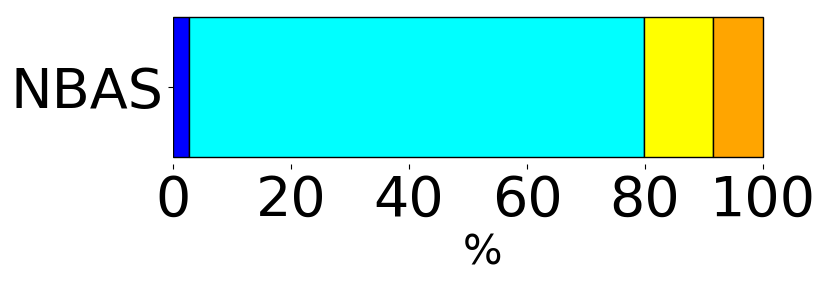

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['NBAS']
factors = ['x > 90', '70 < x ≤ 90', '50 < x ≤ 70', 'x ≤ 50']
values = np.array([[66, 1826, 276, 203]])

fig, ax = plt.subplots()

colors = ['blue', 'cyan', 'yellow', 'orange']
fig.set_size_inches(8, 2)

total = np.sum(values)  # Total number of values

for i, cat in enumerate(categories):
    left = 0
    for j, fac in enumerate(factors):
        percentage = values[i][j] / total * 100  # Convert to percentage
        ax.barh(cat, percentage, color=colors[j], edgecolor='black', left=left, label=fac)
        left += percentage

plt.xlabel('%', size=30)

# Customize ticks
plt.xticks(size=40)
plt.yticks(size=40)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


# pymol commands

# find PV

In [82]:
path_var_mis = """
Arg137Trp
Leu903Arg
Arg137Trp
Arg137Trp
Gly254Asp
Gly340Arg
Pro650Ser
p.R2104Q
Arg941His
Leu903Arg
Arg1914His
Ser1129Phe
Trp845Cys
Leu271Pro
Thr731Pro
Pro777His
His940Pro
Ser1129Phe
Gln1201Pro
Cys256Tyr
Trp845Cys
Gly340Arg
Ser343Asn
Tyr747Asp
Arg517Cys
Cys1199Tyr
Leu422Pro
Arg1914His
Arg64His
Pro937Ala
Gln1201Pro
Val519Glu
Ala103Thr
Arg517Cys
Ile984Ser
Cys1199Tyr
Gln2232Glu
Arg1073Cys
Lys1517Glu
Glu2269Lys
Tyr1495His
Arg137Trp
Leu903Arg
Leu1055Pro
Trp396Arg
Val253Gly
Gly254Asp
Val892Phe
Pro650Ser
p.L373P
Arg941His
Leu903Arg
Met1Leu
Arg1914His
Leu271Pro
Thr731Pro
Pro777His
His940Pro
Ser1129Phe
Gln1201Pro
Phe671Cys
Ala1921Pro
Arg1914Cys
Cys1199Tyr
Arg1914His
Arg2335Trp
Leu1549Pro
Arg517Cys
Arg1914His
Val568Ile
Pro937Ala
Gln1201Pro
Val519Glu
Phe1707Ile
Glu151Lys
Arg136Gly
Cys1199Tyr
Pro454Arg
Met1743Val
Pro1474Leu
Glu1521Gln
Thr1097Met
"""

In [84]:
mutation_numbers_mis = set() # for missence
for mutation in path_var_mis.split('\n'):
    if mutation:
        num = ''.join(filter(str.isdigit, mutation))
        if num:  # Убедимся, что значение не пустое
            mutation_numbers_mis.add(int(num)) 

In [86]:
print(mutation_numbers_mis)

{256, 1, 1921, 517, 903, 519, 137, 650, 777, 396, 1549, 136, 271, 151, 1055, 671, 2335, 422, 937, 1707, 940, 941, 1199, 1201, 1073, 2104, 2232, 568, 64, 1474, 454, 1097, 845, 1743, 340, 343, 984, 1495, 731, 2269, 103, 1129, 747, 1517, 1521, 373, 1914, 892, 253, 254}


In [88]:
path_var_all = """Arg137Trp
Arg137Trp
Arg137Trp
Ile187del
Leu903Arg
Leu202del
Leu903Arg
Arg1004*
Ile512Thrfs*4
Pro348Ser
Pro348Ser
Trp396*
Ser230Glnfs*4
Glu943*
Cys426Trp
Ala95Val
Arg137Trp
Arg1914His
Arg1914His
Gly270Ala
Arg137Trp
Arg1914His
C1199Y
C1199Y
E803K
His227Pro
His227Pro
Arg1914His
R1914H
Thr1918Pro
Glu447Lys
C1199Y
Arg501*
Ser230Glnfs*4
Arg1914His
Ile984Leufs*8
Arg1914His
Gly254Asp
Gly340Arg
Pro650Ser
p.R2104Q
Arg941His
Leu903Arg
Arg1914His
Arg1914His
Arg1914His
Ser6*
Ser1129Phe
Trp845Cys
Ala95Val
Leu271Pro
Ser414Phe
Ser414Phe
Arg517Cys
Arg517His
Arg517His
Thr731Pro
Pro777His
Pro777His
Pro937Ala
His940Pro
Ile984Ser
Leu1055Pro
Ile1121Met
Ser1129Phe
Ser1129Phe
Ser1178Arg
Gln1201Pro
Leu1708Pro
Arg1914His
Arg1914Gly
Ala1921Pro
Gln2322Hisfs*18
Cys256Tyr
Trp845Cys
Tyr142*
Phe167LeufsTer10
Gly340Arg
Trp1095*
Ala1146GlnfsTer14
Arg941His
Phe231ThrfsTer35
Ser343Asn
Val393ArgfsTer2
Tyr747Asp
Gln1039*
Ser230Glnfs*4
Arg1914His
R517C
C1199Y
Leu422Pro
Arg1914His
Arg1914His
Tyr1578dup
Arg64His
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Ala103Thr
Ser544ValfsTer11
Gly877Val
R517C
Ile984Ser
Ile984Ser
Ile984Ser
Arg873Trp
Cys1199Tyr
R916*
Q2232E
R1073C
K1517E
E2269K
Y1495H
Met1702*
Arg313Profs*2
Arg137Trp
Arg137Trp
Arg137Trp
Ser230Glnfs*4
Leu903Arg
Leu1055Pro
Glu943*
Leu1055Pro
Ile984Ser
Pro777His
Val842Phe
Leu1055Pro
Val1528Glyfs*2
Ile1121Met
Lys284*
Trp396Arg
Arg1004*
Gln678*
Ser976Profs*16
Val253Gly
Glu943*
M2204Ifs*3
Q196*
Trp583*
Trp583*
Ser230fs*4
Arg1914His
Arg1914His
S2166Ffs*
Phe167Cysfs7
Leu1818fsX16
Trp135*
His1053Arg
Glu2189*
Gly254Asp
Val892Phe
Pro650Ser
T1254Hfs*16 
p.L373P
Arg941His
Leu903Arg
Ser544fs
Arg1914His
Met1Leu
Arg1914His
Gln134Arg
Trp934*
Leu271Pro
Ile984Leufs*8
Glu2080*
Ser1681Glnfs*37
Glu2269*
Glu2269*
Thr731Pro
Pro777His
Pro777His
His940Pro
Glu943*
Glu1676Aspfs*10
Ser1129Phe
Ser1129Phe
Gln1201Pro
Arg510*
Leu2293Cysfs*9
Ser230Glnfs*4
Trp1850Glyfs*32
Phe671Cys
Ala1921Pro
Cys1199Tyr
Ala857Val
Cys1199Tyr
Arg1914Cys
Cys1199Tyr
Cys1199Tyr
Cys1199Tyr
Asp2287Tyr
Pro454Arg
Arg1914His
Thr1918Pro
Arg2335Trp
2346delLeu
Glu804Gly
L1549P
Arg517Cys
Arg1914His
Arg1914His
Tyr1578dup
Val568Ile
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Phe1707Ile
Ala409Val
Gln1430*
E151K
Arg136Gly
Arg405*
Arg405*
Cys1199Tyr
C1199Y
P454R
M1743V
P1474L
E1521Q
T1097M
C448R 
"""

In [96]:
mutation_numbers_all = set()
for mutation in path_var_all.split('\n'):
    if mutation and not any(x in mutation for x in ["fs", "Ter", "X", "*"]):
        num = ''.join(filter(str.isdigit, mutation))
        if num:  # Убедимся, что значение не пустое
            mutation_numbers_all.add(int(num))
print(list(set(mutation_numbers_all)))

[256, 1, 517, 519, 777, 1549, 270, 271, 1053, 1055, 2335, 803, 804, 1578, 2346, 1073, 2104, 568, 64, 1097, 842, 845, 340, 343, 857, 348, 95, 1121, 103, 1129, 873, 877, 373, 1914, 892, 1918, 1921, 134, 903, 136, 137, 650, 396, 151, 409, 1178, 414, 671, 422, 937, 426, 1707, 940, 941, 1708, 1199, 1201, 2232, 187, 447, 448, 1474, 454, 202, 1743, 1495, 984, 731, 2269, 227, 747, 1517, 2287, 1521, 253, 254]
